# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [5]:
# Your code here Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000]
# Random variable X (samples from Normal distribution)
np.random.seed(1062020) # genera numeros aleatorios siempre a partir desde el mismo seed
sample_size=[10, 50, 500, 5000]
standard_deviation=5
mean=50
for i,size in enumerate(sample_size):
    X = np.random.normal(loc=mean, size=size, scale=standard_deviation)
    k2, p = stats.normaltest(X)
    print(k2, p)
    alpha = 0.05 # probabilidad del 5%
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

2.372897924264163 0.30530348566334387
p = 0.305303
The null hypothesis cannot be rejected
0.14454050676360058 0.9302794506682236
p = 0.930279
The null hypothesis cannot be rejected
0.8994134578586312 0.6378151769357145
p = 0.637815
The null hypothesis cannot be rejected
2.419176771358384 0.2983200469652312
p = 0.29832
The null hypothesis cannot be rejected


#### Interpret the normaltest results and make your observations.

In [3]:
# Explain the test results here
# la probabilidad es superior al 5% (segundo valor de esta tupla), entonces estamos en una distribucíon normal

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

48.76573280005041 56.347124202459085
41.89220248647 64.5547127141481
33.84789059036545 63.82198971511096
31.505520399768532 67.73916432816151


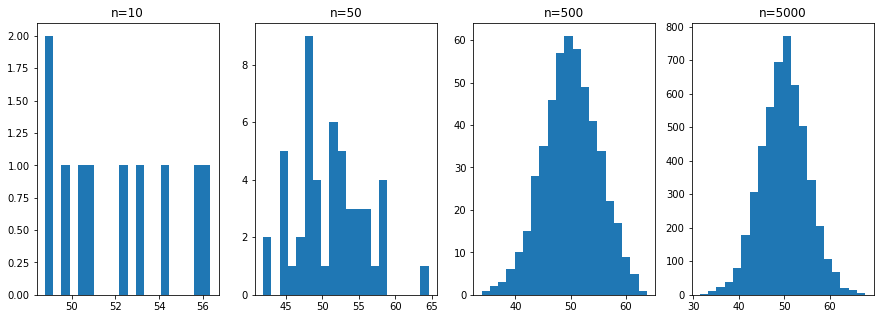

In [7]:
# Your code here
plt.figure(figsize=(15,5))
for i,size in enumerate(sample_size):
    X = np.random.normal(loc=mean, size=size, scale=standard_deviation)
    print(X.min(),X.max())
    # Check that the distribution is normal    
    plt.subplot(1,4,i+1)
    plt.hist(X,bins=20)
    plt.title(f'n={size}');

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [8]:
# Your comment and explanation here
# Dada una población numérica con media µ y desviación estándar σ de la cual se extraen muestras aleatorias 
# que consisten en n individuos, con n suficientemente grande (n> 30), la distribución de las medias muestrales 
# tiende a una distribución gaussiana
# http://www-dimat.unipv.it/mora/galeno2013/Lezione25.pdf

# Challenge 2 - Plot Probability Mass Function (PMF)

##### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

0.75 0.6375 0.8767140075192092 0.36862745098039235


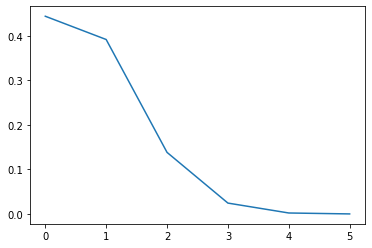

In [42]:
fig, ax = plt.subplots(1, 1)
n, p = 5, 0.15
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
# skew = simmetria del grafico
# kurt = code con valores anomalos
print(mean, var, skew, kurt)

x = np.arange(0, 6)
sns.lineplot(x, binom.pmf(x, n, p))

#### Explain what you observe from the plot above

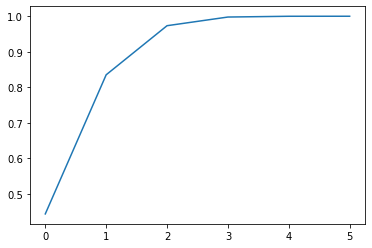

In [43]:
# Your comment here
x = np.arange(0, 6) # pongo 6 porque son 5 people y necesito un num mas
sns.lineplot(x, binom.cdf(x, n, p))
# la cdf es la integral del grafico superior (pmf). Si cojemos el valor en 1 por ejemplo (0.83/2 por simmetria)
# nos da el valor del area hasta el 1 en el grafico superior

#### Now plot PMP with 50, 500, and 5000 visitors.

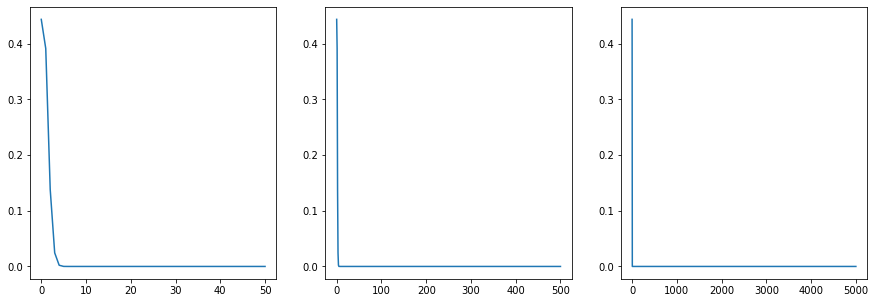

In [47]:
# Your code here
plt.figure(figsize=(15,5))
size = [50, 500, 5000]
for i,num in enumerate(size):
    x = np.arange(0, num+1) # cambio el size
    plt.subplot(1,3,i+1)
    sns.lineplot(x, binom.pmf(x, n, p))

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
#es un modelo probabilístico utilizado para representar situaciones de contar el número de ocurrencias de 
#ciertos eventos en una unidad de tiempo o más precisamente el número de "éxitos" en un cierto intervalo continuo.
# https://www.webtutordimatematica.it/materie/statistica-e-probabilita/distribuzioni-di-probabilita-discrete/distribuzione-di-poisson

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

320.0 320.0 0.05590169943749474 0.003125


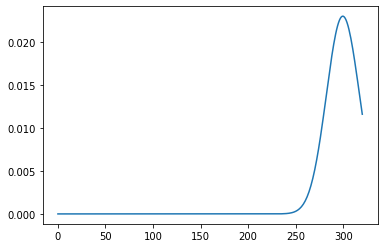

In [50]:
# Your code here
from scipy.stats import poisson
fig, ax = plt.subplots(1, 1)
mu = 320
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
# skew = simmetria del grafico
# kurt = code con valores anomalos
print(mean, var, skew, kurt)

x = np.arange(0, 320+1) # cambio el size
sns.lineplot(x, poisson.pmf(x, 300))

#### What is the probability of getting 60 visits?

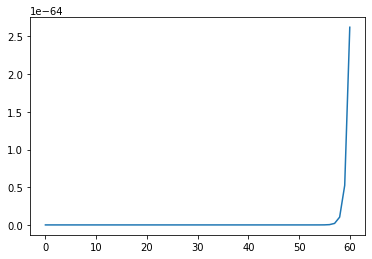

In [54]:
# Your code here
x = np.arange(0, 60+1) # cambio el size
sns.lineplot(x, poisson.pmf(x, 300)) # 300 esel average website visits per day.

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

In [ ]:
# your code here


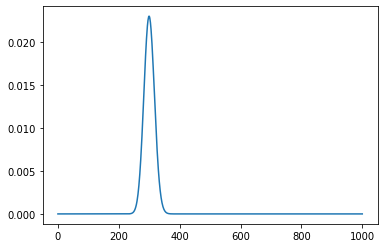

In [53]:
x = np.arange(0, 1000+1) # cambio el size
sns.lineplot(x, poisson.pmf(x, 300))